# **GPS Data - Exploratory Data Analysis**

*GPS performance metrics track movement demands, including speed, distance, and acceleration, to assess workload and physical output.
This dataset contains simulated data for 1 player.*

This notebook is organized in the following sections:

* [Part 0 - Preliminary Steps](#0)
    * [Part 0.1 - Importing the Necessary Libraries](#0.1)
    * [Part 0.2 - Reading the GPS Data Dataset](#0.2)

* [Part 1 - Data Cleaning](#1)
    * [Part 1.1 - Preliminary Analysis of the Dataset](#1.1)
    * [Part 1.2 - Dealing with Duplicates](#1.2)
    * [Part 1.3 - Ensuring Correct Data Types](#1.3)
    * [Part 1.4 - Dealing with Null/Missing Values](#1.4)
    * [Part 1.5 - Final Checks](#1.5)

* [Part 2 - Exploratory Data Analysis](#2)

<a id='0'></a>
## Part 0 - Preliminary Steps

<a id='0.1'></a>
### Part 0.1 - Importing the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<a id='0.2'></a>
### Part 0.2 - Reading the GPS Data Dataset

In [2]:
gps_data = pd.read_csv('../data/CFC GPS Data (1).csv', encoding='ISO-8859-1')

<a id='1'></a>
## Part 1 - Data Cleaning

<a id='1.1'></a>
### Part 1.1 - Preliminary Analysis of the Dataset

In [3]:
gps_data.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
0,02/08/2022,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,119.108101,32.636928,8.557443,76.242369,30.75590,00:03:40,00:17:29,00:19:20,00:11:23,00:00:02
1,03/08/2022,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,45.974019,6.309730,3.095990,65.217830,28.67495,00:06:44,00:16:40,00:15:35,00:06:08,00:00:01
2,04/08/2022,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,97.488512,24.400180,3.825869,105.139759,29.21720,00:17:29,00:37:09,00:23:49,00:06:30,00:00:02
3,05/08/2022,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,43.750265,14.642925,2.189602,64.588434,28.70300,00:07:34,00:15:51,00:07:31,00:01:51,00:00:00
4,06/08/2022,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,122.568127,49.748446,22.201737,46.048353,30.29812,00:01:09,00:01:04,00:11:34,00:13:15,00:02:30


In [4]:
gps_data.tail()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
857,07/04/2025,NaN,NaN,1,-5,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
858,08/04/2025,NaN,NaN,2,-4,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
859,09/04/2025,NaN,NaN,3,-3,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
860,10/04/2025,NaN,NaN,4,-2,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
861,11/04/2025,NaN,NaN,5,-1,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00


The GPS Data dataset has 862 rows, with only 2 columns which have null values.

In [5]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  862 non-null    object 
 1   opposition_code       147 non-null    object 
 2   opposition_full       147 non-null    object 
 3   md_plus_code          862 non-null    int64  
 4   md_minus_code         862 non-null    int64  
 5   season                862 non-null    object 
 6   distance              862 non-null    float64
 7   distance_over_21      862 non-null    float64
 8   distance_over_24      862 non-null    float64
 9   distance_over_27      862 non-null    float64
 10  accel_decel_over_2_5  862 non-null    float64
 11  accel_decel_over_3_5  862 non-null    float64
 12  accel_decel_over_4_5  862 non-null    float64
 13  day_duration          862 non-null    float64
 14  peak_speed            862 non-null    float64
 15  hr_zone_1_hms         8

<a id='1.2'></a>
### Part 1.2 - Dealing with Duplicates

We checked if there were any duplicate rows. We found there were no duplicate rows.

In [6]:
gps_data.duplicated().any()

False

In [7]:
# Another check for duplicates - just in case
gps_data.duplicated().sum()

0

<a id='1.3'></a>
### Part 1.3 - Ensuring Correct Data Types

Next, we proceeded to ensure whether the data types of all columns were correct/adequate

In [8]:
gps_data.dtypes

date                     object
opposition_code          object
opposition_full          object
md_plus_code              int64
md_minus_code             int64
season                   object
distance                float64
distance_over_21        float64
distance_over_24        float64
distance_over_27        float64
accel_decel_over_2_5    float64
accel_decel_over_3_5    float64
accel_decel_over_4_5    float64
day_duration            float64
peak_speed              float64
hr_zone_1_hms            object
hr_zone_2_hms            object
hr_zone_3_hms            object
hr_zone_4_hms            object
hr_zone_5_hms            object
dtype: object

The columns which had incorrect data types were the following:
* `date` --> should have been in datetime format (%d/%m/%Y)
* `day_duration` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration
* `hr_zone_1_hms` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration
* `hr_zone_2_hms` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration
* `hr_zone_3_hms` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration
* `hr_zone_4_hms` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration
* `hr_zone_5_hms` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration


Therefore, we proceeded to transform each of these columns to the correct format.

In [9]:
# Transforming the columns into the correct data type

## Transforming the date column into datetime format
gps_data['date'] = pd.to_datetime(gps_data['date'], format = '%d/%m/%Y')

## Transforming the day_duration column into timedelta format
gps_data['day_duration'] = pd.to_timedelta(gps_data['day_duration'], unit= 'm')

## Transforming all hr_zone columns into timedelta format
### First we created a list with all the hr_zone columns
hr_columns = []
for col in gps_data.columns:
    if 'hr_zone' and '_hms' in col:
        hr_columns.append(col)

### Then using the hr_zone column list, we used it to transform all hr_zone columns into timedelta format
for col in hr_columns:
    gps_data[f'{col}'] = pd.to_timedelta(gps_data[f'{col}'])

For those columns which represent a duration (i.e., in timedelta format), we converted them later on in our project (in the Feature Engineering section) to numerical columns (i.e., in total seconds), as Machine learning models can’t use `"hh:mm:ss"` directly.

<a id='1.4'></a>
### Part 1.4 - Dealing with Null/Missing Values

We then checked for null/missing values, and found there were 2 columns which had null values. These columns were:
* `opposition_code`
* `opposition_full`

These columns represent the code and name of the team Chelsea FC were playing against when there was a matchday. Therefore, null values in both these columns mean that in that given day, there was no match. Therefore, we decided to keep these columns, as they would be useful later on in the Feature Engineering section, where we created a matchday column (1 being matchday, 0 being a non-matchday) which could be beneficial for our analysis and/or predictions later on.

In [10]:
gps_data.isna().sum()

date                      0
opposition_code         715
opposition_full         715
md_plus_code              0
md_minus_code             0
season                    0
distance                  0
distance_over_21          0
distance_over_24          0
distance_over_27          0
accel_decel_over_2_5      0
accel_decel_over_3_5      0
accel_decel_over_4_5      0
day_duration              0
peak_speed                0
hr_zone_1_hms             0
hr_zone_2_hms             0
hr_zone_3_hms             0
hr_zone_4_hms             0
hr_zone_5_hms             0
dtype: int64

Given that the rest of the columns had no null values, we proceeded to carry out some final checks, and later to do some expoloratory data analysis.

<a id='1.5'></a>
### Part 1.5 - Final Checks

In [11]:
gps_data.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
0,2022-08-02,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,119.108101,32.636928,8.557443,0 days 01:16:14.542158600,30.75590,0 days 00:03:40,0 days 00:17:29,0 days 00:19:20,0 days 00:11:23,0 days 00:00:02
1,2022-08-03,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,45.974019,6.309730,3.095990,0 days 01:05:13.069828800,28.67495,0 days 00:06:44,0 days 00:16:40,0 days 00:15:35,0 days 00:06:08,0 days 00:00:01
2,2022-08-04,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,97.488512,24.400180,3.825869,0 days 01:45:08.385540,29.21720,0 days 00:17:29,0 days 00:37:09,0 days 00:23:49,0 days 00:06:30,0 days 00:00:02
3,2022-08-05,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,43.750265,14.642925,2.189602,0 days 01:04:35.306031,28.70300,0 days 00:07:34,0 days 00:15:51,0 days 00:07:31,0 days 00:01:51,0 days 00:00:00
4,2022-08-06,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,122.568127,49.748446,22.201737,0 days 00:46:02.901182400,30.29812,0 days 00:01:09,0 days 00:01:04,0 days 00:11:34,0 days 00:13:15,0 days 00:02:30


In [12]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   date                  862 non-null    datetime64[ns] 
 1   opposition_code       147 non-null    object         
 2   opposition_full       147 non-null    object         
 3   md_plus_code          862 non-null    int64          
 4   md_minus_code         862 non-null    int64          
 5   season                862 non-null    object         
 6   distance              862 non-null    float64        
 7   distance_over_21      862 non-null    float64        
 8   distance_over_24      862 non-null    float64        
 9   distance_over_27      862 non-null    float64        
 10  accel_decel_over_2_5  862 non-null    float64        
 11  accel_decel_over_3_5  862 non-null    float64        
 12  accel_decel_over_4_5  862 non-null    float64        
 13  day_d

In [13]:
gps_data.dtypes

date                     datetime64[ns]
opposition_code                  object
opposition_full                  object
md_plus_code                      int64
md_minus_code                     int64
season                           object
distance                        float64
distance_over_21                float64
distance_over_24                float64
distance_over_27                float64
accel_decel_over_2_5            float64
accel_decel_over_3_5            float64
accel_decel_over_4_5            float64
day_duration            timedelta64[ns]
peak_speed                      float64
hr_zone_1_hms           timedelta64[ns]
hr_zone_2_hms           timedelta64[ns]
hr_zone_3_hms           timedelta64[ns]
hr_zone_4_hms           timedelta64[ns]
hr_zone_5_hms           timedelta64[ns]
dtype: object

In [14]:
gps_data.isna().sum()

date                      0
opposition_code         715
opposition_full         715
md_plus_code              0
md_minus_code             0
season                    0
distance                  0
distance_over_21          0
distance_over_24          0
distance_over_27          0
accel_decel_over_2_5      0
accel_decel_over_3_5      0
accel_decel_over_4_5      0
day_duration              0
peak_speed                0
hr_zone_1_hms             0
hr_zone_2_hms             0
hr_zone_3_hms             0
hr_zone_4_hms             0
hr_zone_5_hms             0
dtype: int64

<a id='2'></a>
## Part 2 - Exploratory Data Analysis

Here we explored some of the summary statistcis for the gps_data dataset.

In [15]:
gps_data.describe()

,date,md_plus_code,md_minus_code,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
count,862,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862,862.000000,862,862,862,862,862
mean,2023-12-03 00:46:46.496519680,3.489559,-3.482599,4348.397275,206.384127,87.730266,32.143318,93.532909,30.914458,9.413703,0 days 01:02:21.075890583,24.327300,0 days 00:06:01.581206496,0 days 00:14:34.571925754,0 days 00:14:28.291183294,0 days 00:08:56.546403712,0 days 00:00:12.924593967
min,2022-08-02 00:00:00,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,2023-03-05 06:00:00,1.000000,-5.000000,2711.332083,40.067120,11.019218,1.239599,50.181008,14.031534,2.862817,0 days 00:45:20.611934100,26.884825,0 days 00:01:59.250000,0 days 00:07:00,0 days 00:07:33.750000,0 days 00:02:39.250000,0 days 00:00:00
50%,2023-12-06 12:00:00,2.000000,-2.000000,4229.806525,140.624828,52.006816,14.919966,91.089483,27.642968,7.496299,0 days 01:07:38.203017900,28.763600,0 days 00:04:50,0 days 00:15:19.500000,0 days 00:16:03.500000,0 days 00:07:02.500000,0 days 00:00:03
75%,2024-09-07 18:00:00,5.000000,-1.000000,6021.526515,292.186658,127.505919,43.802949,134.137148,44.412446,13.057154,0 days 01:25:19.559488800,30.357408,0 days 00:08:43,0 days 00:21:37,0 days 00:20:25.750000,0 days 00:13:39.750000,0 days 00:00:12.750000
max,2025-04-11 00:00:00,10.000000,0.000000,15653.250800,1011.791940,543.629710,286.564259,326.736174,119.575568,43.411480,0 days 03:32:46.232844,32.937000,0 days 00:46:30,0 days 01:04:26,0 days 00:42:39,0 days 00:33:38,0 days 00:02:47
std,NaN,3.246978,3.239427,2841.399651,214.513552,103.481000,43.921496,64.593942,24.278089,8.803952,0 days 00:35:40.644586592,10.914528,0 days 00:05:47.275120153,0 days 00:10:03.394337019,0 days 00:09:01.917559241,0 days 00:07:36.744155676,0 days 00:00:25.251305979


### 📌 **1. Total External Load Analysis**

**Goal**: Understand the overall workload volume for the player.

* **Charts**:

  * 📈 **Time series** of `distance` and `day_duration`: total load per day.
  * 📊 **Histogram** of `distance`: distribution of workload.
  * 🧱 **Boxplot** of `distance` by `md_plus_code` or `md_minus_code`: how load changes before and after matches.

In [26]:
gps_data['distance'].value_counts()

distance
0.000000        141
4524.085076       1
10105.289550      1
1974.722903       1
5327.005771       1
               ... 
3125.057304       1
3577.465034       1
11946.591080      1
5076.582455       1
4621.085135       1
Name: count, Length: 722, dtype: int64

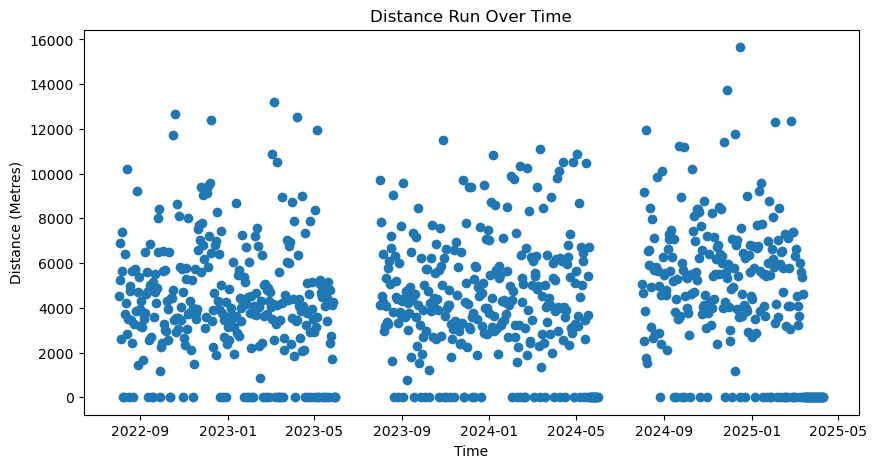

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(gps_data['date'], gps_data['distance'])
plt.title('Distance Run Over Time')
plt.xlabel('Time')
plt.ylabel('Distance (Metres)')
plt.show()

In [ ]:
day_duration_seconds =  []
for value in gps_data['day_duration']:
    day_duration_seconds.append(value.total_seconds())



[4574.542158, 3913.069828, 6308.38554, 3875.306031, 2762.901182, 6999.41424, 0.0, 0.0, 5699.626151, 3615.359752, 3838.126689, 3285.237481, 5784.252778, 3778.300083, 0.0, 4014.151135, 4746.580342, 4893.268057, 3578.515782, 3842.922104, 0.0, 3621.389982, 3868.221536, 4534.998739, 3597.248982, 5413.098934, 3873.362109, 3345.048714, 3402.625564, 1783.535202, 4120.353087, 3776.921734, 1861.054105, 2584.021479, 1825.124314, 1405.376852, 6157.484616, 3133.864451, 4882.312376, 4708.752634, 0.0, 5030.736939, 3283.373711, 4242.096858, 4163.357947, 4332.402464, 0.0, 0.0, 6920.899158, 4893.379368, 4848.391594, 3995.053829, 3652.190929, 4152.199132, 5970.612732, 3633.858859, 6993.256284, 0.0, 3540.873559, 2727.147654, 1932.648631, 4858.252856, 5392.803002, 2837.758843, 2696.571765, 3773.806899, 2518.286603, 2674.63599, 2889.918937, 3826.414256, 3207.717131, 0.0, 0.0, 4597.695527, 4328.574249, 5896.188093, 3943.032353, 4330.192945, 5813.102086, 2247.964897, 5001.882999, 5624.451604, 2305.288972, 292

C:\Users\trtre\AppData\Local\Temp\ipykernel_13012\1208433648.py:2: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(gps_data['md_plus_code'], gps_data['distance'])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

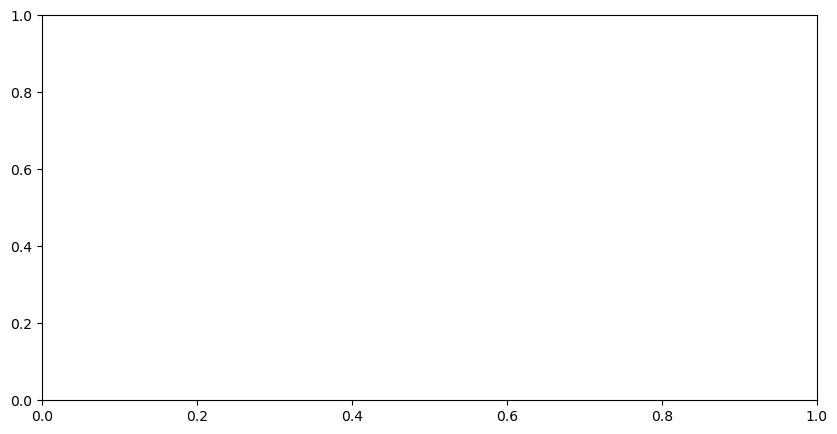

In [37]:
plt.figure(figsize=(10,5))
plt.boxplot(gps_data['md_plus_code'], gps_data['distance'])
plt.title('How load changes before and after matches')
#plt.xlabel('Time')
#plt.ylabel('Distance (Metres)')
plt.show()

### 📌 **2. High-Intensity Running & Peak Speed**

**Goal**: Analyze high-intensity efforts that are more injury-prone.

* **Charts**:

  * 📈 **Line chart** of `distance_over_21`, `distance_over_24`, `distance_over_27` to spot trends.
  * 📊 **Grouped bar chart** to compare by week or month.
  * 🧱 **Boxplot** of `peak_speed` by type of day (`md_code`): do speed peaks occur right before match days?




### 📌 **3. Neuromuscular Load (Accelerations/Decelerations)**

**Goal**: Rapid acceleration/deceleration adds stress to the body.

* **Charts**:

  * 📈 Time series of `accel_decel_over_2_5`, `3_5`, `4_5`.
  * 🔥 **Heatmap** by week or month to detect high-demand periods.
  * 📊 Before vs. after match comparisons using `md_minus_code` and `md_plus_code`.



### 📌 **4. Load vs. Session Duration**

**Goal**: See if longer sessions are also more intense.

* **Charts**:

  * 🟠 **Scatter plots** between `day_duration` and variables like `distance`, `accel_decel`, `peak_speed`.
  * 📈 Line chart of **load per minute**: e.g. `distance/day_duration` as a relative intensity metric.

### 📌 **5. Cardiovascular Stress (If HR zones are clean)**

**Goal**: Measure internal load alongside external.

* **Charts**:

  * 📊 Pie charts or stacked bars of % time in each HR zone (`hr_zone_1` to `hr_zone_5`).
  * 📈 Daily evolution of time spent in zones 4–5 (high intensity → more strain).

### 📌 **6. Detecting Possible Injury Periods**

**Goal**: Use anomalies in load to infer potential injury or rest periods.

* **Charts**:

  * 📉 Days with `distance = 0` or `day_duration = 0` as a proxy for inactivity.
  * 🔁 Compare workload before/during/after those days: any overload before? Any sudden drop after?


### 📌 **7. Load Spikes or Acute vs. Chronic Load Ratios**

**Goal**: Identify imbalances that could lead to injury.

* **Ideas**:

  * 🟠 Calculate **ACWR** (Acute\:Chronic Workload Ratio) using rolling means.
  * 📈 Plot ACWR over time to find high-risk periods (e.g., ACWR > 1.5).

### 📌 **8. Typical Day Comparisons**

**Goal**: Understand workload variability across different training phases.

* **Charts**:

  * 📊 **Boxplots** or **violin plots** by day type (`md-2`, `md-1`, `md+1`).
  * 📆 Group by week or month to spot trends (e.g., higher loads during specific phases of the season).